ValueError: x and y must be the same size

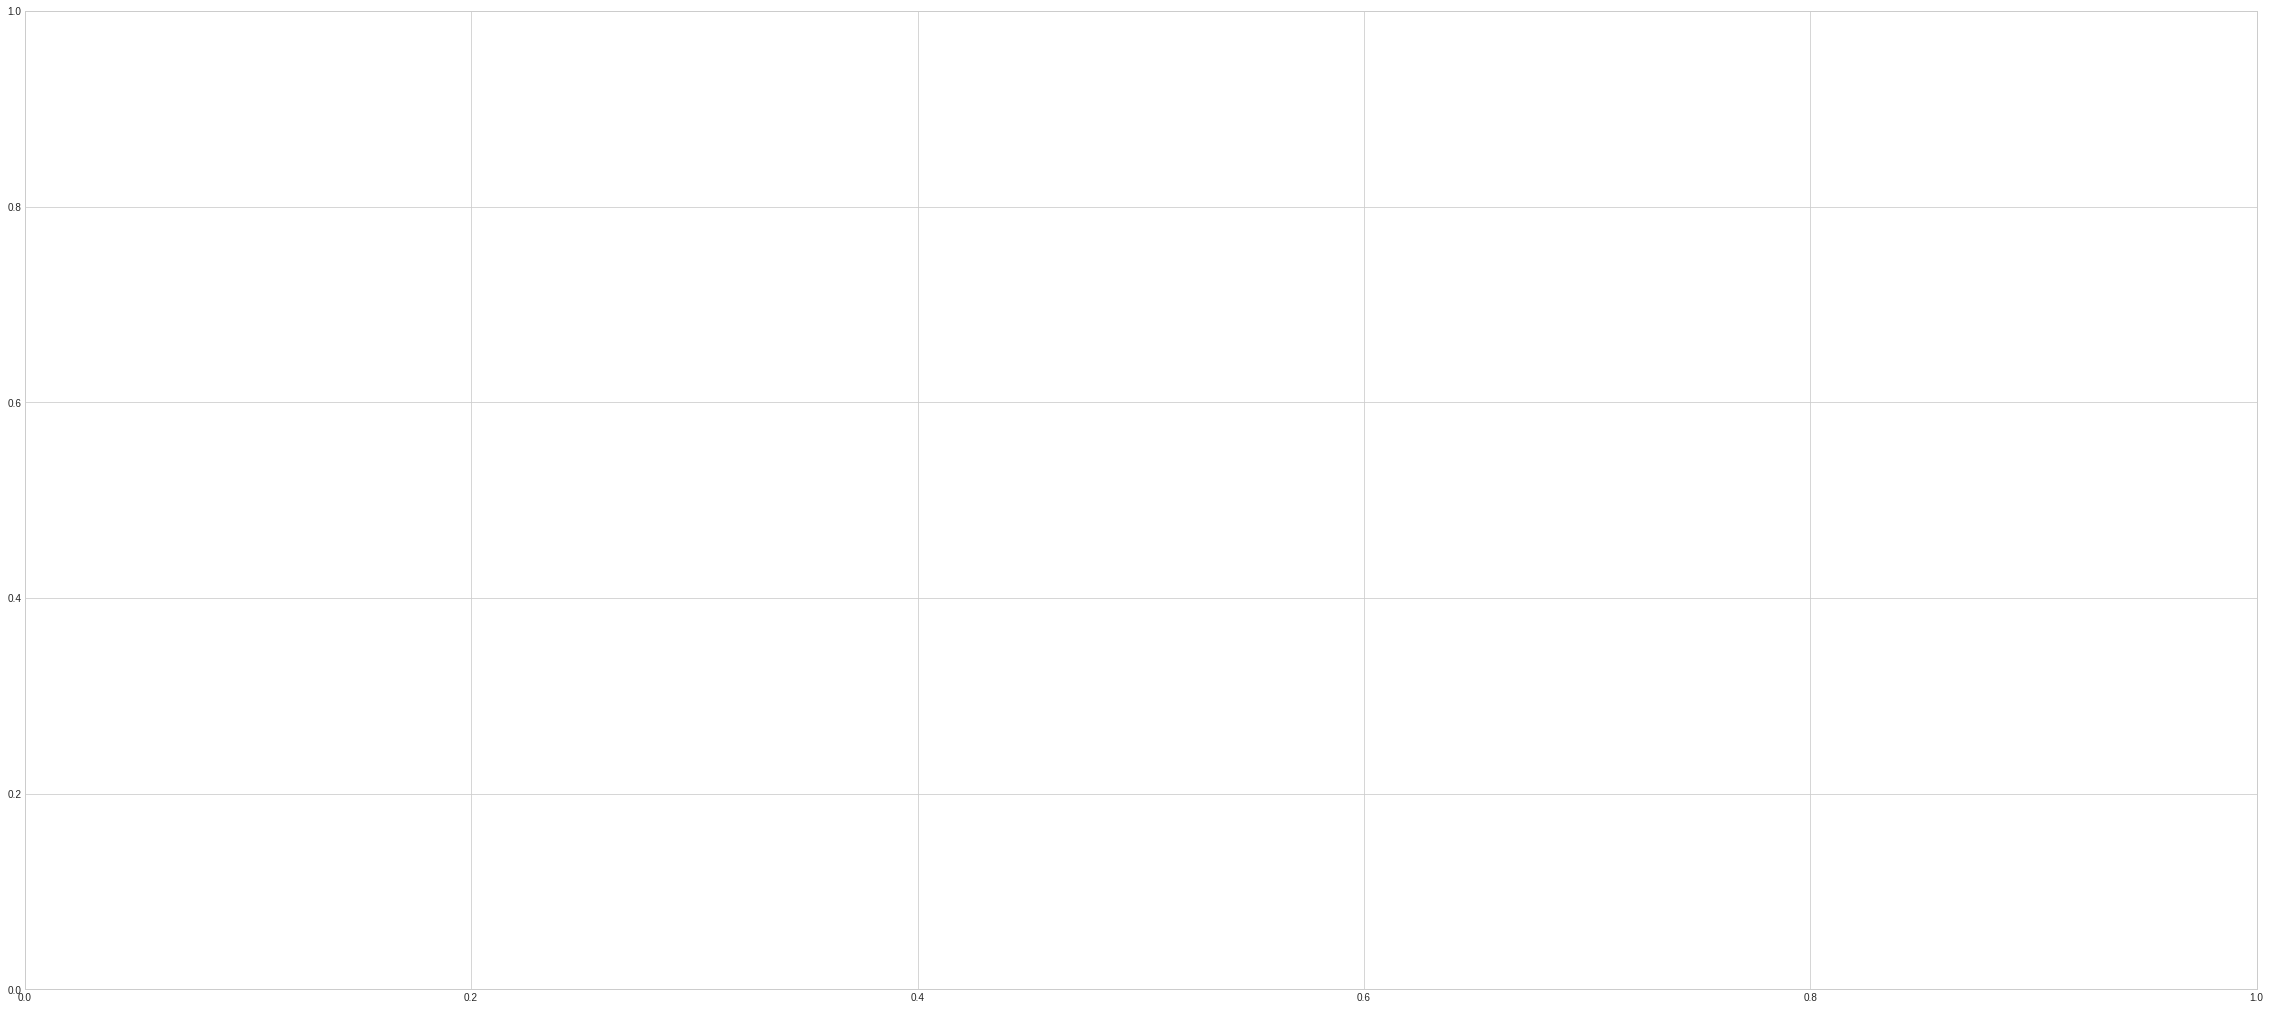

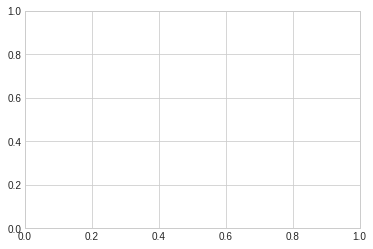

In [74]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import numpy as np

import plotly.graph_objects as go
import scipy
from scipy import signal

# import statsmodels.formula.api as smf
from scipy.interpolate import make_interp_spline, BSpline

fig = plt.figure(figsize = (40,18))
ax = plt.subplot(111)

###### какой атом анализируем?###############################################################################
atom_list = ["Li", "Na", "K", "Cs", "Rb"]
counter = 0
colours = ["red", "green", "blue", "black", "purple"]
for atom in atom_list:
######################################################################################################################

    working_location = os.chdir("/home/oikura/Desktop/synchronization/WORK/IT/Yulia/%s/dist_out" % (atom)) # перемещение процесса в локацию не нужно и дает ошибку когда работаешь с относительными путями
    working_location = os.getcwd()
#     print(working_location)

    #read wham output data
    data = pd.read_csv(working_location + "/%s.out" % (atom), sep='\s+') # без header=None так как хочу обращаться к столбцам по легенде

    #чистим данные от NaN
    data = data.fillna(0) #заполняем нулями отсутствующие данные NaN
    indexNaN = data['Prob'] == 0 #получаем датафрейм в котором в столбце Prob нули
    index_drop_NaN = data[indexNaN].index #получаем индексы строк, которые надо дропнуть
    data.drop(index_drop_NaN, inplace=True) #дропаем
    # print (data) #просмотр полученного фрейма

    graph_df = pd.DataFrame({"x, Coor": data ["#Coor"], 'y, Free': data ["Free"]}) #creating array for plotting
    # print (graph_df)

    plt.figure()
    graph_df=graph_df.astype(float)


    # вытаскиваем из датафрейма листы с переменными которые будем фиттить
    x = graph_df ["x, Coor"].to_list()
    y = graph_df ["y, Free"].to_list()
    #  print (x, y)
    fitted_data = pd.DataFrame(columns=['y', 'x'])
    fitted_data['x'] = x
    fitted_data['y'] = y

    # 300 represents number of points to make between T.min and T.max
    xnew = np.linspace(np.array(x).min(), np.array(x).max(),80) 
    # print (xnew)
    # сглаживание кривой
#     spl = make_interp_spline(x, y, k=3)  # type: BSpline
#     y_smooth = spl(xnew)


#     plt.scatter(x, y, color='red')
    graph_smooth_df = pd.DataFrame(columns=['y', 'x'])
    graph_smooth_df['x'] = xnew
    graph_smooth_df['y'] = y_smooth    


    graph_df.plot(kind='scatter',x='x, Coor',y='y, Free', color=colours [counter], ax=ax, label=atom)
    graph_df.plot(x='x, Coor',y='y, Free', color=colours [counter], ax=ax, label='')
    graph_smooth_df.plot(x='x',y='y', color=colours [counter], ax=ax, label='')
    
    counter = counter + 1
    # показать график
    ax.legend()
    ax.grid(True)
plt.show()
